In [202]:
import pandas as pd
import numpy as np
import re
import geopy
from geopy.distance import vincenty
import matplotlib.pyplot as plt

# 1. Trips 

## 1.1  handle the trips data for specific route

In [204]:
# Change csv file for specific route
trips = pd.read_csv("trips_145.csv", sep=',')
trips.head()


FileNotFoundError: File b'trips_routes/trips_1.txt' does not exist

In [150]:
trips.shape

(59675, 11)

In [151]:
# Convert day of service to date time
trips['dayofservice'] = pd.to_datetime(trips['dayofservice'])

In [152]:
# The lineid of trips are all specific route, So could be dropped.
trips = trips.drop(['lineid'], axis=1)

In [153]:
#rename the tripid to tripID which enable merging the two tables
trips.rename(columns ={'tripid':"tripID"},inplace = True )

In [154]:
trips.head()

,dayofservice,tripID,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,suppressed,justificationid
0,2016-02-09,2824642,145_105,2,45668,40800,45375.0,40782.0,NaN,NaN
1,2016-04-08,3010920,145_102,1,36753,31800,36610.0,31838.0,NaN,NaN
2,2016-04-02,2902410,145_105,2,70381,65700,70340.0,65664.0,NaN,NaN
3,2016-04-02,2909769,145_102,1,43017,38700,44054.0,39131.0,NaN,NaN
4,2016-04-02,2909770,145_105,2,49355,44100,49585.0,44314.0,NaN,NaN


# 2. Leavetimes_distance 

In [155]:
leavetimes = pd.read_csv("leavetimes_distance.csv", sep=',')
leavetimes.head()

,dayofservice,tripID,progrnumber,stoppointid,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,new_prog,diff_prog,diff_planned_arr_stop,diff_actual_arr_stop,diff_planned_next_stop_time,pre_stop,now_stop,distance,cumlativesum_distance
0,31-MAY-17 00:00:00,5003110,1,7574,22200,22200,23150,23150,1,NaN,NaN,NaN,NaN,NaN,7574,NaN,NaN
1,24-JUN-16 00:00:00,3264732,1,7574,30600,30600,30558,30558,1,NaN,NaN,NaN,526.0,NaN,7574,NaN,NaN
2,05-JAN-17 00:00:00,4094962,1,4320,30600,30600,30501,30501,1,NaN,NaN,NaN,562.0,NaN,4320,NaN,NaN
3,14-JUN-16 00:00:00,3229752,1,4320,30600,30600,30564,30564,1,NaN,NaN,NaN,115.0,NaN,4320,NaN,NaN
4,31-MAY-17 00:00:00,5018182,1,7574,30600,30600,30645,30645,1,NaN,NaN,NaN,600.0,NaN,7574,NaN,NaN


In [156]:
leavetimes['dayofservice'] = pd.to_datetime(leavetimes['dayofservice'])

In [157]:
leavetimes.shape

(2907523, 17)

In [158]:
leavetimes.head()

,dayofservice,tripID,progrnumber,stoppointid,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,new_prog,diff_prog,diff_planned_arr_stop,diff_actual_arr_stop,diff_planned_next_stop_time,pre_stop,now_stop,distance,cumlativesum_distance
0,2017-05-31,5003110,1,7574,22200,22200,23150,23150,1,NaN,NaN,NaN,NaN,NaN,7574,NaN,NaN
1,2016-06-24,3264732,1,7574,30600,30600,30558,30558,1,NaN,NaN,NaN,526.0,NaN,7574,NaN,NaN
2,2017-01-05,4094962,1,4320,30600,30600,30501,30501,1,NaN,NaN,NaN,562.0,NaN,4320,NaN,NaN
3,2016-06-14,3229752,1,4320,30600,30600,30564,30564,1,NaN,NaN,NaN,115.0,NaN,4320,NaN,NaN
4,2017-05-31,5018182,1,7574,30600,30600,30645,30645,1,NaN,NaN,NaN,600.0,NaN,7574,NaN,NaN


In [159]:
leavetimes.notnull().mean()

dayofservice                   1.000000
tripID                         1.000000
progrnumber                    1.000000
stoppointid                    1.000000
plannedtime_arr_stop           1.000000
plannedtime_dep_stop           1.000000
actualtime_arr_stop            1.000000
actualtime_dep_stop            1.000000
new_prog                       1.000000
diff_prog                      0.983680
diff_planned_arr_stop          0.983680
diff_actual_arr_stop           0.983680
diff_planned_next_stop_time    0.987262
pre_stop                       0.983680
now_stop                       1.000000
distance                       0.961603
cumlativesum_distance          0.961603
dtype: float64

# 3. Merge the leavetimes and trips table together

In [160]:
final = pd.merge(leavetimes, trips, on=['tripID','dayofservice'])

In [161]:
final.head()

,dayofservice,tripID,progrnumber,stoppointid,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,new_prog,diff_prog,...,distance,cumlativesum_distance,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,suppressed,justificationid
0,2017-05-31,5003110,1,7574,22200,22200,23150,23150,1,NaN,...,NaN,NaN,145_105,2,26474,22200,27231.0,23150.0,NaN,NaN
1,2017-05-31,5003110,2,4177,22327,22327,23258,23258,2,1.0,...,428.432176,428.432176,145_105,2,26474,22200,27231.0,23150.0,NaN,NaN
2,2017-05-31,5003110,3,4178,22357,22357,23272,23272,3,1.0,...,270.334233,698.766409,145_105,2,26474,22200,27231.0,23150.0,NaN,NaN
3,2017-05-31,5003110,4,4179,22416,22416,23319,23332,4,1.0,...,469.656438,1168.422847,145_105,2,26474,22200,27231.0,23150.0,NaN,NaN
4,2017-05-31,5003110,5,2993,22468,22468,23384,23384,5,1.0,...,421.109853,1589.532699,145_105,2,26474,22200,27231.0,23150.0,NaN,NaN


Check quality of columns

In [162]:
# Convert date time to timestamp
final['dayofservice_new'] = final.dayofservice.values.astype(np.int64) // 10 ** 9

In [163]:
final.rename(columns={"stoppointid":"stop_id"},inplace = True )

In [164]:
final.notnull().mean()

dayofservice                   1.000000
tripID                         1.000000
progrnumber                    1.000000
stop_id                        1.000000
plannedtime_arr_stop           1.000000
plannedtime_dep_stop           1.000000
actualtime_arr_stop            1.000000
actualtime_dep_stop            1.000000
new_prog                       1.000000
diff_prog                      0.983664
diff_planned_arr_stop          0.983664
diff_actual_arr_stop           0.983664
diff_planned_next_stop_time    0.987295
pre_stop                       0.983664
now_stop                       1.000000
distance                       0.961580
cumlativesum_distance          0.961580
routeid                        1.000000
direction                      1.000000
plannedtime_arr                1.000000
plannedtime_dep                1.000000
actualtime_arr                 0.970703
actualtime_dep                 0.955158
suppressed                     0.000000
justificationid                0.000000


In [165]:
final = final.dropna(how='all')
final.shape

(2882617, 26)

In [166]:
# alse drio the suppressed and justificationid
final = final.drop(['suppressed','justificationid'],axis =1)

# 4. Bus Stops & Weather Stations

## 4.1 Clean table

In [167]:
weatherstation = pd.read_csv("bus_stops-stations.csv", sep=',')
weatherstation.head()

,stop_id,stop_name,stop_lat,stop_lon,stationid
0,7612,Davenport Hotel Merrion Street,53.341347,-6.250529,1
1,2,"Rotunda, Parnell Square West",53.352244,-6.263723,1
2,3,"Rotunda, Granby Place",53.352309,-6.263811,1
3,4,"Rotunda, Rotunda Hospital",53.352575,-6.264175,1
4,6,"Rotunda, Saint Martin's Chapel",53.352749,-6.264454,1


In [168]:
weatherstation.dtypes

stop_id        int64
stop_name     object
stop_lat     float64
stop_lon     float64
stationid      int64
dtype: object

In [169]:
# Stop_name, stop_lat and stop_lon are useless, So drop them.
weatherstation = weatherstation.drop(['stop_name','stop_lat','stop_lon'], axis=1)

In [170]:
weatherstation.head()

,stop_id,stationid
0,7612,1
1,2,1
2,3,1
3,4,1
4,6,1


## 4.2 Merge with main table

In [171]:
final = pd.merge(final, weatherstation, on=['stop_id'])

In [172]:
final.head()

,dayofservice,tripID,progrnumber,stop_id,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,new_prog,diff_prog,...,distance,cumlativesum_distance,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,dayofservice_new,stationid
0,2017-05-31,5003110,1,7574,22200,22200,23150,23150,1,NaN,...,NaN,NaN,145_105,2,26474,22200,27231.0,23150.0,1496188800,2
1,2016-06-24,3264732,1,7574,30600,30600,30558,30558,1,NaN,...,NaN,NaN,145_105,2,36095,30600,37183.0,30558.0,1466726400,2
2,2017-01-05,4094962,69,7574,36073,36073,35032,35032,69,1.0,...,404.006738,29257.236999,145_102,1,36073,30600,35032.0,30501.0,1483574400,2
3,2016-06-14,3229752,69,7574,36276,36276,36174,36174,69,1.0,...,404.006738,27101.813319,145_102,1,36276,30600,36174.0,30564.0,1465862400,2
4,2017-05-31,5018182,1,7574,30600,30600,30645,30645,1,NaN,...,NaN,NaN,145_105,2,36721,30600,37021.0,30645.0,1496188800,2


# 5. Weather

In [173]:
weather = pd.read_csv("weather.csv", sep=',')
weather.head()

,date,rain,temp,wdsp,stationid
0,1451606400,0.0,1.9,8.0,1
1,1451610000,0.0,1.6,7.0,1
2,1451613600,0.0,0.7,6.0,1
3,1451617200,0.0,0.8,6.0,1
4,1451620800,0.0,2.9,5.0,1


## 5.1 Update dates and times to merge with main table

In [174]:
final["timeofarrival"] = final["dayofservice_new"] + final["plannedtime_arr_stop"]
final.head()

,dayofservice,tripID,progrnumber,stop_id,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,new_prog,diff_prog,...,cumlativesum_distance,routeid,direction,plannedtime_arr,plannedtime_dep,actualtime_arr,actualtime_dep,dayofservice_new,stationid,timeofarrival
0,2017-05-31,5003110,1,7574,22200,22200,23150,23150,1,NaN,...,NaN,145_105,2,26474,22200,27231.0,23150.0,1496188800,2,1496211000
1,2016-06-24,3264732,1,7574,30600,30600,30558,30558,1,NaN,...,NaN,145_105,2,36095,30600,37183.0,30558.0,1466726400,2,1466757000
2,2017-01-05,4094962,69,7574,36073,36073,35032,35032,69,1.0,...,29257.236999,145_102,1,36073,30600,35032.0,30501.0,1483574400,2,1483610473
3,2016-06-14,3229752,69,7574,36276,36276,36174,36174,69,1.0,...,27101.813319,145_102,1,36276,30600,36174.0,30564.0,1465862400,2,1465898676
4,2017-05-31,5018182,1,7574,30600,30600,30645,30645,1,NaN,...,NaN,145_105,2,36721,30600,37021.0,30645.0,1496188800,2,1496219400


In [175]:
final['timeofarrival']=pd.to_datetime(final['timeofarrival'],unit='s')
final["date"] = pd.DatetimeIndex(final['timeofarrival']).round('H').values.astype(np.int64) // 10 ** 9
final["timeofarrival_year"] = pd.DatetimeIndex(final['timeofarrival']).year
final["timeofarrival_month"] = pd.DatetimeIndex(final['timeofarrival']).month
final["timeofarrival_hour"] = pd.DatetimeIndex(final['timeofarrival']).hour
final["timeofarrival_weekday"] = pd.DatetimeIndex(final['timeofarrival']).weekday
final.head()

,dayofservice,tripID,progrnumber,stop_id,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,new_prog,diff_prog,...,actualtime_arr,actualtime_dep,dayofservice_new,stationid,timeofarrival,date,timeofarrival_year,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday
0,2017-05-31,5003110,1,7574,22200,22200,23150,23150,1,NaN,...,27231.0,23150.0,1496188800,2,2017-05-31 06:10:00,1496210400,2017,5,6,2
1,2016-06-24,3264732,1,7574,30600,30600,30558,30558,1,NaN,...,37183.0,30558.0,1466726400,2,2016-06-24 08:30:00,1466755200,2016,6,8,4
2,2017-01-05,4094962,69,7574,36073,36073,35032,35032,69,1.0,...,35032.0,30501.0,1483574400,2,2017-01-05 10:01:13,1483610400,2017,1,10,3
3,2016-06-14,3229752,69,7574,36276,36276,36174,36174,69,1.0,...,36174.0,30564.0,1465862400,2,2016-06-14 10:04:36,1465898400,2016,6,10,1
4,2017-05-31,5018182,1,7574,30600,30600,30645,30645,1,NaN,...,37021.0,30645.0,1496188800,2,2017-05-31 08:30:00,1496217600,2017,5,8,2


In [176]:
final = pd.merge(final, weather, on=['date','stationid'])
final.head()

,dayofservice,tripID,progrnumber,stop_id,plannedtime_arr_stop,plannedtime_dep_stop,actualtime_arr_stop,actualtime_dep_stop,new_prog,diff_prog,...,stationid,timeofarrival,date,timeofarrival_year,timeofarrival_month,timeofarrival_hour,timeofarrival_weekday,rain,temp,wdsp
0,2017-05-31,5003110,1,7574,22200,22200,23150,23150,1,NaN,...,2,2017-05-31 06:10:00,1496210400,2017,5,6,2,0.0,11.6,5.0
1,2017-05-31,5003110,2,4177,22327,22327,23258,23258,2,1.0,...,2,2017-05-31 06:12:07,1496210400,2017,5,6,2,0.0,11.6,5.0
2,2017-05-31,5003110,3,4178,22357,22357,23272,23272,3,1.0,...,2,2017-05-31 06:12:37,1496210400,2017,5,6,2,0.0,11.6,5.0
3,2017-05-31,5003110,4,4179,22416,22416,23319,23332,4,1.0,...,2,2017-05-31 06:13:36,1496210400,2017,5,6,2,0.0,11.6,5.0
4,2017-05-31,5003110,5,2993,22468,22468,23384,23384,5,1.0,...,2,2017-05-31 06:14:28,1496210400,2017,5,6,2,0.0,11.6,5.0


In [177]:
final.shape

(2866216, 34)

# 5. drop the useless table

## 5.1  drop bank holidays and avoid their influence to time table. 

In [178]:
# create a dataframe to store the date of bankholiday
# Deleted bank holidays from final table
bankHolidays =["2016-01-01","2016-03-17","2016-03-25","2016-03-28","2016-05-02","2016-06-06","2016-08-01","2016-10-31","2016-12-25","2016-12-26","2016-12-27","2016-12-28","2017-01-01","2017-01-02","2017-03-17","2017-04-14","2017-04-17","2017-05-01","2017-06-05","2017-08-07","2017-10-30","2017-12-25","2017-12-26","2017-12-27"]

final = final.loc[~ final["dayofservice"].isin(bankHolidays)]

In [179]:
final.shape

(2815476, 34)

## 5.2 Test and drop the routeid

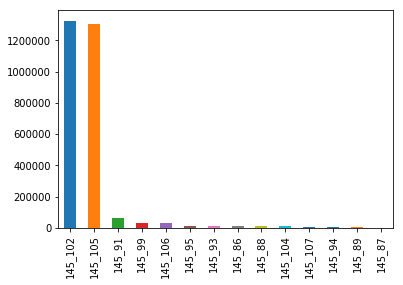

In [180]:
final.routeid.value_counts().plot(kind='bar')

In [181]:
final['routeid'].value_counts(normalize = True)

145_102    0.471199
145_105    0.463608
145_91     0.022741
145_99     0.010062
145_106    0.010061
145_95     0.004254
145_93     0.004155
145_86     0.003362
145_88     0.003177
145_104    0.003166
145_107    0.001491
145_94     0.001205
145_89     0.000875
145_87     0.000645
Name: routeid, dtype: float64

the result shows that 145_102 and 145_105 accout for the 90%, So it is better to drop other class at this stage.

In [182]:
final = final.loc[final["routeid"].isin(["145_102", "145_105"])]

In [183]:
final.shape

(2631925, 34)

## 5.3  Only keep the summer table

In [184]:
final.timeofarrival_month.unique()

array([5, 6, 1, 2, 3, 4, 7], dtype=int64)

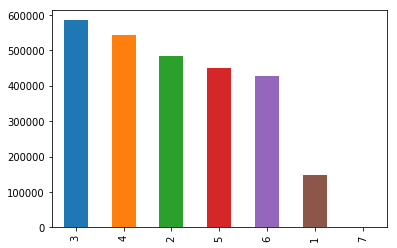

In [185]:
final.timeofarrival_month.value_counts().plot(kind='bar')

In [186]:
final['timeofarrival_month'].value_counts(normalize = True)

3    0.222028
4    0.206092
2    0.183358
5    0.170602
6    0.162075
1    0.055819
7    0.000027
Name: timeofarrival_month, dtype: float64

In [187]:
final = final.loc[final["timeofarrival_month"].isin([6,7])]

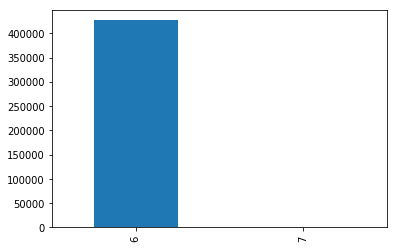

In [188]:
final.timeofarrival_month.value_counts().plot(kind='bar')

In [189]:
final['timeofarrival_month'].value_counts(normalize = True)

6    0.999834
7    0.000166
Name: timeofarrival_month, dtype: float64

In [190]:
final.shape

(426640, 34)

## 5.4 Drop the year and month

In [191]:
# Do not need year, drop it
final = final.drop(['timeofarrival_year','timeofarrival_month'], axis=1)

In [192]:
final.shape

(426640, 32)

# 6. Final table clean up

## 6.1 Target Feature

In [193]:
#target feature is the delay of arrival time at each stop
final["actualtime_delay"] = final["actualtime_arr_stop"]-final["plannedtime_arr_stop"]

In [194]:
final.dtypes

dayofservice                   datetime64[ns]
tripID                                  int64
progrnumber                             int64
stop_id                                 int64
plannedtime_arr_stop                    int64
plannedtime_dep_stop                    int64
actualtime_arr_stop                     int64
actualtime_dep_stop                     int64
new_prog                                int64
diff_prog                             float64
diff_planned_arr_stop                 float64
diff_actual_arr_stop                  float64
diff_planned_next_stop_time           float64
pre_stop                              float64
now_stop                                int64
distance                              float64
cumlativesum_distance                 float64
routeid                                object
direction                               int64
plannedtime_arr                         int64
plannedtime_dep                         int64
actualtime_arr                    

In [195]:
#get rid of the timeofarrival which is the medium valibles of the table
final = final.drop(['timeofarrival','date'], axis=1)
final = final.drop(['dayofservice'], axis=1)

In [196]:
#times on the stop including actual and planned situations
# final_route["plannedtime_timeonstop"] = final_route["plannedtime_dep_stop"]-final_route['plannedtime_arr_stop']
final["actualtime_timeonstop"] = final["actualtime_dep_stop"]-final["actualtime_arr_stop"]
final["plannedtime_onroad"]= final["plannedtime_arr_stop"]- final["plannedtime_dep"]
final["plannedtime_route"] = final["plannedtime_arr"]-final["plannedtime_dep"]

In [197]:
final['target'] = final['actualtime_timeonstop']+final['actualtime_delay']

In [198]:
final.dtypes

tripID                           int64
progrnumber                      int64
stop_id                          int64
plannedtime_arr_stop             int64
plannedtime_dep_stop             int64
actualtime_arr_stop              int64
actualtime_dep_stop              int64
new_prog                         int64
diff_prog                      float64
diff_planned_arr_stop          float64
diff_actual_arr_stop           float64
diff_planned_next_stop_time    float64
pre_stop                       float64
now_stop                         int64
distance                       float64
cumlativesum_distance          float64
routeid                         object
direction                        int64
plannedtime_arr                  int64
plannedtime_dep                  int64
actualtime_arr                 float64
actualtime_dep                 float64
dayofservice_new                 int64
stationid                        int64
timeofarrival_hour               int64
timeofarrival_weekday    

In [199]:
dataForModel =  final[["stop_id","progrnumber","diff_planned_arr_stop","diff_planned_next_stop_time","distance","direction","routeid","timeofarrival_weekday","timeofarrival_hour",'rain',"temp","wdsp","actualtime_delay","plannedtime_onroad","plannedtime_route"]]
dataForModel

,stop_id,progrnumber,diff_planned_arr_stop,diff_planned_next_stop_time,distance,direction,routeid,timeofarrival_weekday,timeofarrival_hour,rain,temp,wdsp,actualtime_delay,plannedtime_onroad,plannedtime_route
19,7574,1,NaN,526.0,NaN,2,145_105,4,8,0.4,12.4,8.0,-42,0,5495
20,7574,1,NaN,526.0,NaN,2,145_105,4,8,0.4,12.4,8.0,-24,0,5495
21,7574,1,NaN,600.0,NaN,2,145_105,4,7,0.4,12.4,8.0,-11,0,4828
22,7574,1,NaN,600.0,NaN,2,145_105,4,7,0.4,12.4,8.0,-52,0,5495
23,7574,69,87.0,74.0,404.006738,1,145_102,4,8,0.4,12.4,8.0,-244,4274,4274
24,7574,1,NaN,526.0,NaN,2,145_105,4,8,0.4,12.4,8.0,8,0,5495
25,7574,1,NaN,526.0,NaN,2,145_105,4,8,0.4,12.4,8.0,-6,0,5495
26,7574,69,87.0,74.0,404.006738,1,145_102,4,8,0.4,12.4,8.0,261,4274,4274
27,7574,69,87.0,74.0,404.006738,1,145_102,4,7,0.4,12.4,8.0,-471,4274,4274
28,7574,69,87.0,74.0,404.006738,1,145_102,4,8,0.4,12.4,8.0,339,4274,4274


In [200]:
dataForModel.dtypes

stop_id                          int64
progrnumber                      int64
diff_planned_arr_stop          float64
diff_planned_next_stop_time    float64
distance                       float64
direction                        int64
routeid                         object
timeofarrival_weekday            int64
timeofarrival_hour               int64
rain                           float64
temp                           float64
wdsp                           float64
actualtime_delay                 int64
plannedtime_onroad               int64
plannedtime_route                int64
dtype: object

## 7.1 Save the final table for specific route

In [201]:
# # Change csv file for specific route
# final.to_csv("final_route_145.csv",index=False)
# dataForModel.to_csv("model.csv", index =False)